In [1]:
import pandas as pd
import numpy as np
# 数据加载
df = pd.read_csv('./cs-training.csv')
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [2]:
#去掉第一列
df_train = df.iloc[:,1:]
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


违约率：0.06684


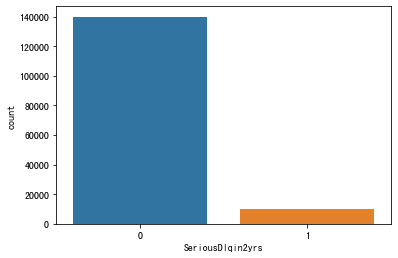

In [3]:
# 违约率和缺失值可视化
import matplotlib.pyplot as plt
import seaborn as sns
# SeriousDlqin2yrs 违约率可视化, countplot 以bar 的形式展示每个类别的数量
sns.countplot(x='SeriousDlqin2yrs', data = df_train)
print('违约率：{}'.format(df_train['SeriousDlqin2yrs'].sum()/ len(df_train)))

In [4]:
# 缺失值比例
null_num = df_train.isnull().sum()
pd.DataFrame({'列名':null_num.index, '缺失值个数':null_num.values, '比例': null_num.values/len(df_train) })

,列名,缺失值个数,比例
0,SeriousDlqin2yrs,0,0.000000
1,RevolvingUtilizationOfUnsecuredLines,0,0.000000
2,age,0,0.000000
3,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
4,DebtRatio,0,0.000000
5,MonthlyIncome,29731,0.198207
6,NumberOfOpenCreditLinesAndLoans,0,0.000000
7,NumberOfTimes90DaysLate,0,0.000000
8,NumberRealEstateLoansOrLines,0,0.000000
9,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


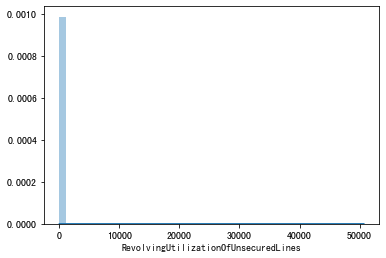

In [5]:
# 字段RevolvingUtilizationOfUnsecuredLines探索
print(df_train['RevolvingUtilizationOfUnsecuredLines'].describe())
# 直方图
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

In [6]:
# 缺失值填充
df_train.info()
# 使用中位数进行缺失值填充
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# 数据分箱

In [7]:
# 对于age字段， 分成6段[-math.inf, 25, 40, 50, 60, 70, math.inf]
import math
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['age'].value_counts()
df_train['age_bins'] = pd.cut(df_train['age'], bins=age_bins)
df_train[['age', 'age_bins']]

,age,age_bins
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [8]:
# 对于NumberOfDependents （家属人数）字段，分成6段[-math.inf, 2, 4, 6, 8, 10, math.inf]
dependent_bins = [-math.inf, 2, 4, 6, 8, 10, math.inf]
df_train['NumberOfDependents_bins'] = pd.cut(df_train['NumberOfDependents'], bins=dependent_bins)
df_train[['NumberOfDependents', 'NumberOfDependents_bins']]

,NumberOfDependents,NumberOfDependents_bins
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [9]:
# 对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段
# [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['NumberOfTime30-59DaysPastDueNotWorse_bins'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['NumberOfTime60-89DaysPastDueNotWorse_bins'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=dpd_bins)
df_train['NumberOfTimes90DaysLate_bins'] = pd.cut(df_train['NumberOfTimes90DaysLate'], bins=dpd_bins)

In [10]:
# 对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 
# 分成5段，采用等频的方式qcut进行分箱, duplicates='drop'表示重复的边界合并（相同的分箱合并）

df_train['RevolvingUtilizationOfUnsecuredLines_bins'] = pd.qcut(df['RevolvingUtilizationOfUnsecuredLines'], q=5, duplicates='drop')
df_train['DebtRatio_bins'] = pd.qcut(df['DebtRatio'], q=5, duplicates='drop')
df_train['MonthlyIncome_bins'] = pd.qcut(df['MonthlyIncome'], q=5)
df_train['NumberOfOpenCreditLinesAndLoans_bins'] = pd.qcut(df['NumberOfOpenCreditLinesAndLoans'], q=5, duplicates='drop')
df_train['NumberRealEstateLoansOrLines_bins'] = pd.qcut(df['NumberRealEstateLoansOrLines'], q=5, duplicates='drop')

In [11]:
# 查看等频分箱结果
df_train[['RevolvingUtilizationOfUnsecuredLines','RevolvingUtilizationOfUnsecuredLines_bins', 'DebtRatio', 'DebtRatio_bins', \
          'MonthlyIncome','MonthlyIncome_bins','NumberOfOpenCreditLinesAndLoans','NumberOfOpenCreditLinesAndLoans_bins',\
         'NumberRealEstateLoansOrLines','NumberRealEstateLoansOrLines_bins']]

,RevolvingUtilizationOfUnsecuredLines,RevolvingUtilizationOfUnsecuredLines_bins,DebtRatio,DebtRatio_bins,MonthlyIncome,MonthlyIncome_bins,NumberOfOpenCreditLinesAndLoans,NumberOfOpenCreditLinesAndLoans_bins,NumberRealEstateLoansOrLines,NumberRealEstateLoansOrLines_bins
0,0.766127,"(0.699, 50708.0]",0.802982,"(0.468, 4.0]",9120.0,"(9083.0, 3008750.0]",13,"(12.0, 58.0]",6,"(2.0, 54.0]"
1,0.957151,"(0.699, 50708.0]",0.121876,"(-0.001, 0.134]",2600.0,"(-0.001, 3000.0]",4,"(-0.001, 4.0]",0,"(-0.001, 1.0]"
2,0.658180,"(0.271, 0.699]",0.085113,"(-0.001, 0.134]",3042.0,"(3000.0, 4544.2]",2,"(-0.001, 4.0]",0,"(-0.001, 1.0]"
3,0.233810,"(0.0832, 0.271]",0.036050,"(-0.001, 0.134]",3300.0,"(3000.0, 4544.2]",5,"(4.0, 6.0]",0,"(-0.001, 1.0]"
4,0.907239,"(0.699, 50708.0]",0.024926,"(-0.001, 0.134]",63588.0,"(9083.0, 3008750.0]",7,"(6.0, 9.0]",1,"(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,"(0.0192, 0.0832]",0.225131,"(0.134, 0.287]",2100.0,"(-0.001, 3000.0]",4,"(-0.001, 4.0]",1,"(-0.001, 1.0]"
149996,0.299745,"(0.271, 0.699]",0.716562,"(0.468, 4.0]",5584.0,"(4544.2, 6300.0]",4,"(-0.001, 4.0]",1,"(-0.001, 1.0]"
149997,0.246044,"(0.0832, 0.271]",3870.000000,"(4.0, 329664.0]",5400.0,NaN,18,"(12.0, 58.0]",1,"(-0.001, 1.0]"
149998,0.000000,"(-0.001, 0.0192]",0.000000,"(-0.001, 0.134]",5716.0,"(4544.2, 6300.0]",4,"(-0.001, 4.0]",0,"(-0.001, 1.0]"


In [12]:
df_train.isnull().sum()

SeriousDlqin2yrs                                 0
RevolvingUtilizationOfUnsecuredLines             0
age                                              0
NumberOfTime30-59DaysPastDueNotWorse             0
DebtRatio                                        0
MonthlyIncome                                    0
NumberOfOpenCreditLinesAndLoans                  0
NumberOfTimes90DaysLate                          0
NumberRealEstateLoansOrLines                     0
NumberOfTime60-89DaysPastDueNotWorse             0
NumberOfDependents                               0
age_bins                                         0
NumberOfDependents_bins                          0
NumberOfTime30-59DaysPastDueNotWorse_bins        0
NumberOfTime60-89DaysPastDueNotWorse_bins        0
NumberOfTimes90DaysLate_bins                     0
RevolvingUtilizationOfUnsecuredLines_bins        0
DebtRatio_bins                                   0
MonthlyIncome_bins                           29731
NumberOfOpenCreditLinesAndLoans

### 疑问：为什么MonthlyIncome变量分箱后会有变量分箱为空？

In [14]:
bin_cols = ['age_bins', 'NumberOfDependents_bins', 'NumberOfTime30-59DaysPastDueNotWorse_bins', \
            'NumberOfTime60-89DaysPastDueNotWorse_bins', 'NumberOfTimes90DaysLate_bins', 'RevolvingUtilizationOfUnsecuredLines_bins',\
            'DebtRatio_bins', 'MonthlyIncome_bins', 'NumberOfOpenCreditLinesAndLoans_bins', 'NumberRealEstateLoansOrLines_bins']

In [15]:
# 计算IV，衡量自变量的预测能力
def cal_IV(df, feature, target):
    lst = []
    cols = ['feature', 'val', 'num', 'bad_num'] # 分别代表 字段名称、分箱数值段、在该分箱数值段的总个数、在该分箱数值中bad的个数
    for i in range(df[feature].nunique()): #nunique = unique的个数
        val = list(df[feature].unique())[i]
        # 统计feature，feature_value， 这个value的个数，这个value导致target为1的个数
        lst.append([feature, val])
        temp1 = df[df[feature]==val].count()[feature] # 这个value的总个数
        temp2 = df[(df[feature]==val) & (df[target]==1)].count()[feature] # 这个value导致target为1的个数
        #print(feature, val, temp1, temp2)
        lst.append([feature, val, temp1, temp2])
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['bad_num']>0]
    data['num_ratio'] = data['num'] / data['num'].sum()
    data['bad_ratio'] = data['bad_num'] / data['num']
    data['bad_margin_rate'] = data['bad_num'] / data['bad_num'].sum()
    data['good_margin_rate'] = (data['num'] - data['bad_num'])/(data['num'].sum() - data['bad_num'].sum())
    data['WOE'] = np.log(data['bad_margin_rate']/data['good_margin_rate'])
    data['IV'] = data['WOE'] * (data['bad_margin_rate'] - data['good_margin_rate'])
    
    data = data.sort_values(by=['feature', 'val'])
    return data['IV'].sum()

In [16]:
#cal_IV(df_train, 'age_bins', 'SeriousDlqin2yrs')
# 统计所有字段的IV值
for col in bin_cols:
    IV = cal_IV(df_train, col, 'SeriousDlqin2yrs')
    print(col, IV)
    

age_bins 0.24041120302785984
NumberOfDependents_bins 0.01450836007644442
NumberOfTime30-59DaysPastDueNotWorse_bins 0.49244477457019803
NumberOfTime60-89DaysPastDueNotWorse_bins 0.2665587583516951
NumberOfTimes90DaysLate_bins 0.49160685733515563
RevolvingUtilizationOfUnsecuredLines_bins 1.0596188771423887
DebtRatio_bins 0.05948761145809681
MonthlyIncome_bins 0.09578345329829879
NumberOfOpenCreditLinesAndLoans_bins 0.04802315528985505
NumberRealEstateLoansOrLines_bins 0.0120914141106244


# 筛选出IV>0.1 的变量
age_bins、NumberOfTime30-59DaysPastDueNotWorse_bins、NumberOfTime60-89DaysPastDueNotWorse_bins、 NumberOfTimes90DaysLate_bins、RevolvingUtilizationOfUnsecuredLines_bins

In [17]:
def cal_WOE(df, features, target):
    df_new = df.copy()
    for feature in features:
        df_woe = df_new.groupby(feature).agg({target:['sum', 'count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        #print(df_woe.columns)
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns={target+'sum' : 'bad_num', target+'count' : 'num'})
        print(df_woe)
        
        df_woe['good_num'] = df_woe['num'] - df_woe['bad_num']
        df_woe = df_woe[[feature, 'good_num', 'bad_num']]
        df_woe['bad_margin_rate'] = df_woe['bad_num'] / df_woe['bad_num'].sum()
        df_woe['good_margin_rate'] = df_woe['good_num'] / df_woe['good_num'].sum()
        
        #计算woe
        df_woe['woe'] = df_woe['bad_margin_rate'].divide(df_woe['good_margin_rate'])
        # 拼接
        df_new = df_new.merge(df_woe, on=feature, how='left')
    return df_new

In [18]:
feature_bin_cols = ['age_bins', 'NumberOfTime30-59DaysPastDueNotWorse_bins', 'NumberOfTime60-89DaysPastDueNotWorse_bins',\
                'NumberOfTimes90DaysLate_bins', 'RevolvingUtilizationOfUnsecuredLines_bins']
feature_cols = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse',\
                'NumberOfTimes90DaysLate', 'RevolvingUtilizationOfUnsecuredLines']

# 计算这些特征的WOE值
df_woe = cal_WOE(df_train, ['age_bins'], 'SeriousDlqin2yrs')
df_woe

       age_bins  bad_num    num
0  (-inf, 25.0]      338   3028
1  (25.0, 40.0]     3296  32069
2  (40.0, 50.0]     2893  35037
3  (50.0, 60.0]     2149  34806
4  (60.0, 70.0]      952  27424
5   (70.0, inf]      398  17636


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,RevolvingUtilizationOfUnsecuredLines_bins,DebtRatio_bins,MonthlyIncome_bins,NumberOfOpenCreditLinesAndLoans_bins,NumberRealEstateLoansOrLines_bins,good_num,bad_num,bad_margin_rate,good_margin_rate,woe
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(0.699, 50708.0]","(0.468, 4.0]","(9083.0, 3008750.0]","(12.0, 58.0]","(2.0, 54.0]",32144,2893,0.288550,0.229643,1.256516
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3000.0]","(-0.001, 4.0]","(-0.001, 1.0]",28773,3296,0.328745,0.205560,1.599270
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(0.271, 0.699]","(-0.001, 0.134]","(3000.0, 4544.2]","(-0.001, 4.0]","(-0.001, 1.0]",28773,3296,0.328745,0.205560,1.599270
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(0.0832, 0.271]","(-0.001, 0.134]","(3000.0, 4544.2]","(4.0, 6.0]","(-0.001, 1.0]",28773,3296,0.328745,0.205560,1.599270
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(0.699, 50708.0]","(-0.001, 0.134]","(9083.0, 3008750.0]","(6.0, 9.0]","(-0.001, 1.0]",32144,2893,0.288550,0.229643,1.256516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3000.0]","(-0.001, 4.0]","(-0.001, 1.0]",17238,398,0.039697,0.123151,0.322341
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(0.271, 0.699]","(0.468, 4.0]","(4544.2, 6300.0]","(-0.001, 4.0]","(-0.001, 1.0]",32144,2893,0.288550,0.229643,1.256516
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(0.0832, 0.271]","(4.0, 329664.0]",NaN,"(12.0, 58.0]","(-0.001, 1.0]",32657,2149,0.214343,0.233308,0.918713
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(-0.001, 0.0192]","(-0.001, 0.134]","(4544.2, 6300.0]","(-0.001, 4.0]","(-0.001, 1.0]",28773,3296,0.328745,0.205560,1.599270
